## 1. Data Pre-Processing

## 1) Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df_labels = pd.read_csv('./converted_data/data_labels_mainData.csv')
df_extra = pd.read_csv('./converted_data/data_labels_extraData.csv')

In [3]:
df_labels.head(100)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
95,18857,3,18857.png,fibroblast,0,0
96,18858,3,18858.png,fibroblast,0,0
97,18859,3,18859.png,fibroblast,0,0
98,18861,3,18861.png,fibroblast,0,0


In [54]:
df_celltype = df_labels.groupby(['cellType']).size()
df_celltype.head()

cellType
0    1888
1    2543
2    4079
3    1386
dtype: int64

In [4]:
df_extra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


## 2) Data Exploration (EDA for df_main)

### 2.1) Hypothesis

> Hypothesis 1: The percentage of those with cancerous cell is over 60%
Hypothesis 2: The percentage of the image being identify as cancerous for each patientID will be over 50%

Hypothesis 3: Cell Type 2  is cancerous cell, the rest is non cancerous

Hypothesis 4: Cell Type 2 have highest frequency.

Hypothesis 5: All of the image in the dataset have the same resolution 27x27

### 2.2) Exploring trends

In [5]:
df_labels.max()

InstanceID         22444
patientID             60
ImageName       9999.png
cellTypeName      others
cellType               3
isCancerous            1
dtype: object

In [6]:
df_labels.mean()

InstanceID     10193.880154
patientID         29.762025
cellType           1.501516
isCancerous        0.412187
dtype: float64

> As observed from the mean of the dataset, the average percentage of those that have cancer is higher as the mean is around 0.412. From here, we can use this as a starting point to finding out the trend.

In [34]:
df_labels.groupby(['isCancerous']).mean()

,InstanceID,patientID,cellType
isCancerous,,,
0,12623.813306,29.779783,1.151968
1,6728.589360,29.736700,2.000000


In [28]:
df_patientmain = df_labels.groupby(['InstanceID']).mean()

In [29]:
df_patientmain.head(100)

,patientID,cellType,isCancerous
InstanceID,,,
1,36,0,0
2,36,0,0
3,36,0,0
4,36,0,0
5,36,0,0
...,...,...,...
99,36,2,1
100,36,2,1
101,36,2,1


> After grouping the dataset by patient ID, we can observed that the dataset contains a total of 60 different patients.

In [10]:
df_patientID = df_labels['patientID']

In [11]:
df_labels.loc[df_patientID,'isCancerous']

1     0
1     0
1     0
1     0
1     0
     ..
60    0
60    0
60    0
60    0
60    0
Name: isCancerous, Length: 9896, dtype: int64

### 2.3) Plotting patients with cancerous cells

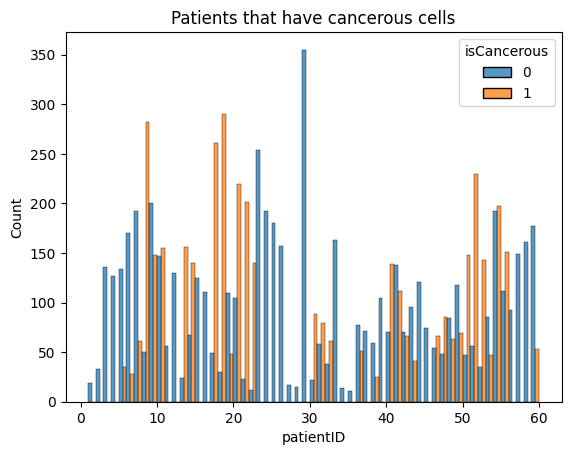

In [12]:
sns.histplot(binwidth=1,
            x='patientID',
            hue='isCancerous',
            data=df_labels,
            stat="count",
            multiple="dodge")
# sns.relplot(x="y", y="poutcome", data=df);
plt.title('Patients that have cancerous cells')
plt.show()

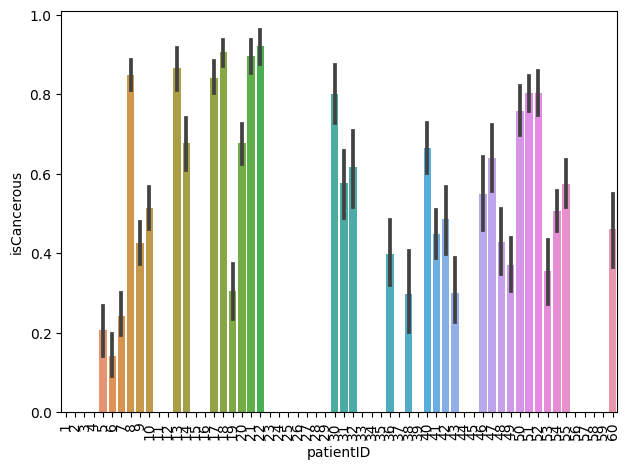

In [13]:
import seaborn as sns
ax = sns.barplot(data= df_labels , x='patientID', y = 'isCancerous')
ax.tick_params(axis = 'x', rotation = 90)
plt.tight_layout()

> The bar plot provide us with a clearer view of to which patient (identify with patient ID) to have cancerous cells. And as observed, a lot of the patients doesn't have any cancerous cells (0), but we still can not precisely determine the percentage of each group.

### 2.4) The percentage of those with cancerous cell is over 60%

In [14]:
df_labels['isCancerous'].value_counts()


0    5817
1    4079
Name: isCancerous, dtype: int64

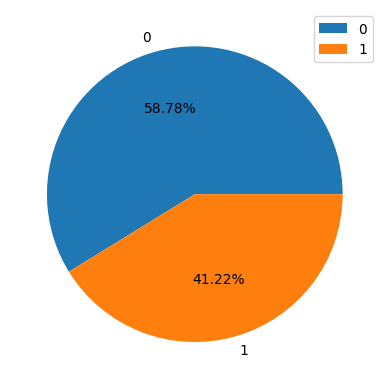

In [15]:
data = df_labels['isCancerous'].value_counts()
classes = ['0','1'] 

plt.pie(data, labels = classes, autopct = '%1.2f%%')
plt.legend()

> As observed from the pie chart, the percentage of those that does not have cancerous cells is higher than those without. The percentage of those the data that have cancerous cells is only at around 41%. This disprove our initial hypothesis of 'the percentage of those with cancerous cell is over 60%'.

### 2.5) The percentage of the image being identify as cancerous for each patientID will be over 50%

In [36]:
df_patient1 = df_labels.groupby(['patientID']).size()

In [45]:
df_patient1.head(100)

patientID
1      19
2      33
3     136
4     127
5     169
6     198
7     253
8     332
9     348
10    302
11     56
12    130
13    180
14    207
15    125
16    111
17    310
18    320
19    158
20    325
21    224
22    152
23    254
24    192
25    180
26    157
27     17
28     15
29    355
30    110
31    137
32     99
33    163
34     14
35     11
36    128
37     71
38     84
39    105
40    209
41    250
42    136
43    137
44    121
45     74
46    120
47    133
48    147
49    187
50    195
51    286
52    178
53    132
54    389
55    263
56     92
57    149
58    161
59    115
60    115
dtype: int64

In [49]:
df_labels.sort_values('patientID').head(100)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
18,22424,1,22424.png,others,3,0
16,22422,1,22422.png,inflammatory,1,0
15,22421,1,22421.png,inflammatory,1,0
14,22420,1,22420.png,inflammatory,1,0
...,...,...,...,...,...,...
178,18947,3,18947.png,others,3,0
177,18946,3,18946.png,inflammatory,1,0
176,18945,3,18945.png,inflammatory,1,0
175,18944,3,18944.png,inflammatory,1,0


### 2.6) Cell Type 2 is Cancerous, the rest is non-cancerous

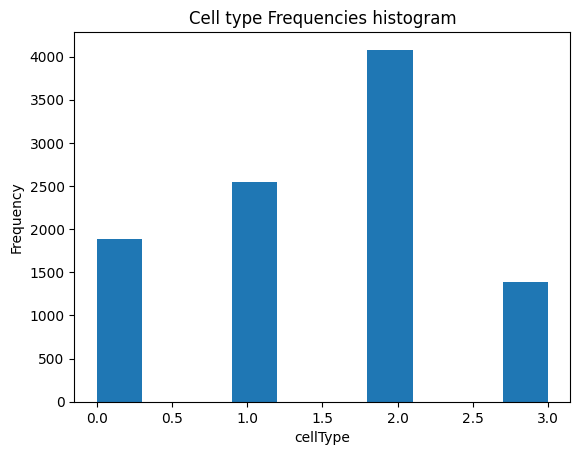

In [62]:
df_labels['cellType'].plot(kind = 'hist', bins = 10)
plt.title ('Cell type Frequencies histogram')
plt.xlabel('cellType')
plt.show()

In [72]:
# group by frequency of cell types from total patitents by cell type name
total_each_cell = df_labels.groupby('cellTypeName', as_index=False).agg({'patientID': 'nunique'})

# total number of patients
total_patient = df_labels['patientID'].nunique()

# create new percentage column based on cell type frequency
total_each_cell['percent'] = [round((i*100)/total_patient,0) for i in total_each_cell['patientID']]

# sketch bar chart
fig = px.bar(
    total_each_cell,
    x="cellTypeName",
    y="percent",
    labels={"percent": "Frequency from Total Patients", "celltypename": "Cell Name"},
    text_auto= True,
    title = "Cell Type Frequency Bar Chart"
)
fig.show()

> As seen from the histogram, cell type 2 does have the highest frequencies out of the data. With the the least being cell type 3.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d871b9e-4e37-4fce-a22e-8733be6e4afc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>